### Exploratory Data Analysis of Connecttel Telecommunication Company.
#### Exploring and identifying the keys features correlating to target(churn). features 


In [1]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data vitualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Data Analysis Libraries
import pandas as pd
import numpy as np
from collections import Counter
import imblearn


### Data Assessment

In [3]:
# Reading data
df= pd.read_csv(r"C:\Users\DELL PRO\Downloads\Customer-Churn1.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Data information and summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Checking for missing features
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Observation:
- The dataset does not have missing data points 

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

#### Observation:
- The dataset does not have duplicate data 

In [7]:
# Statistical distribution of numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Statistical distribution of categorical features
df.describe(exclude= ['int64','float64'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [9]:
# Identifying features
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Univariate Analysis

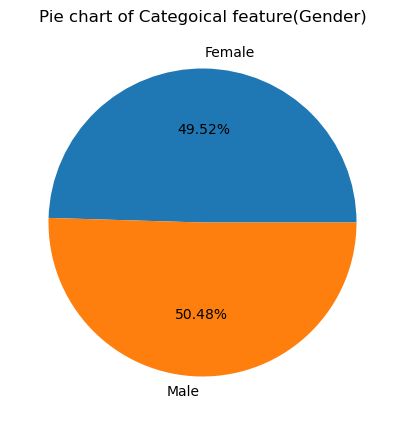

In [10]:
# Gender distribution
fig,ax = plt.subplots(figsize=(5,5))
count= Counter(df['gender'])
ax.pie(count.values(), labels=count.keys(), autopct= lambda p:f'{p:.2f}%')
ax.set_title('Pie chart of Categoical feature(Gender)');

### Observation:
Both female and male have approximately the same percentage distribution. Female(49.52)% and Male(50.48)%

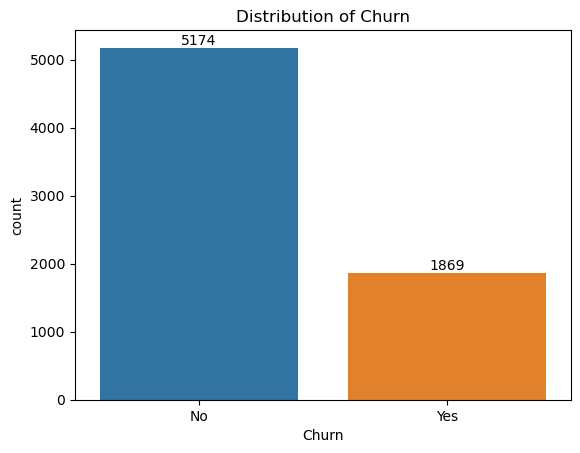

In [11]:
# Distribution of churn
ax = sns.countplot(x = df['Churn'], data = df, order = df['Churn'].value_counts(ascending= False).index)
values = df['Churn'].value_counts(ascending= False).values
ax.bar_label(container = ax.containers[0], labels = values)
plt.title('Distribution of Churn');

#### Observation:
The count of customers that is retained is 5174 while the count of customers that have left is 1869. The customer retention rate is 73.46 % while customer churn rate is 26.57 %.  

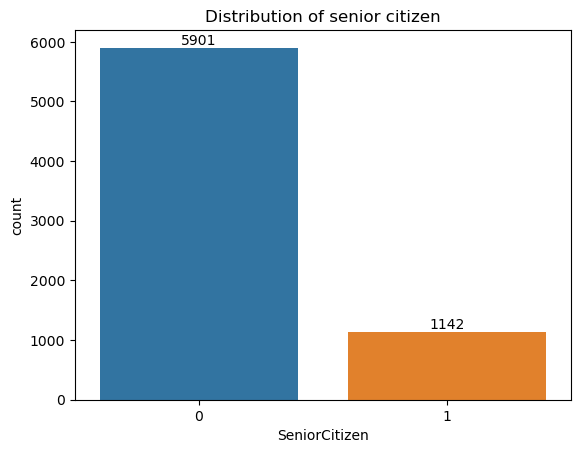

In [12]:
# Distribution of senior citizen
ax = sns.countplot(x = df['SeniorCitizen'], data = df, order = df['SeniorCitizen'].value_counts(ascending= False).index)
values = df['SeniorCitizen'].value_counts(ascending= False).values
ax.bar_label(container = ax.containers[0], labels = values)
plt.title('Distribution of senior citizen');


#### Observation:
The proportion of senior citizen shows that the number of customers that are not senior citizens is 5901 as the number of senioor citizen customers is 1142. 

Text(0.5, 1.0, 'Box plot on Tenure')

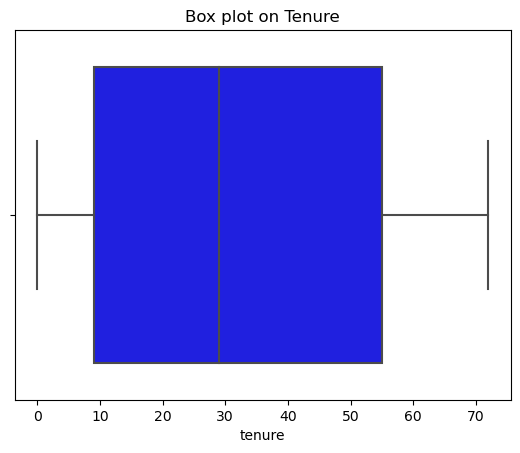

In [13]:
# Box plot of numerical feature(Tenure)
sns.boxplot(x= df['tenure'], data= df, color = 'b')
plt.title('Box plot on Tenure')

#### Observation:
There are no outliers in tenure distribution

Text(0.5, 1.0, 'Box plot on Monthly Charges')

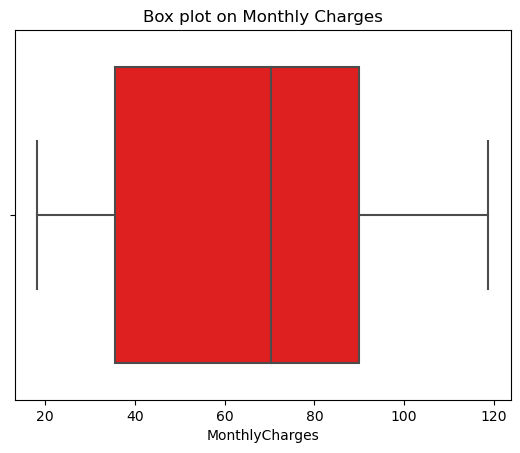

In [14]:
# Box plot of numericalfeature(monthly charges)
sns.boxplot(x= df['MonthlyCharges'], data= df, color = 'r')
plt.title('Box plot on Monthly Charges')

#### Observation:
There are no outliers in monthly charges distribution

Text(0.5, 1.0, 'Distribution of Payment Method')

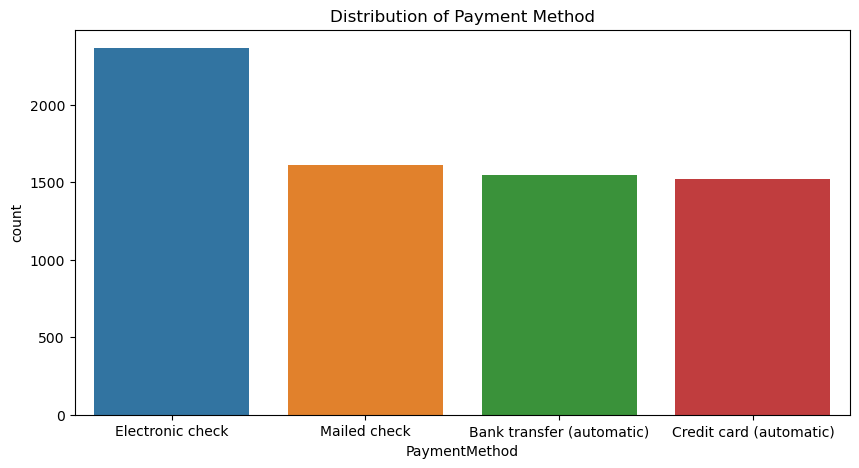

In [15]:
plt.figure(figsize=(10,5)) 
sns.countplot(x = df['PaymentMethod'], data = df, order = df['PaymentMethod'].value_counts(ascending= False).index) 
plt.title('Distribution of Payment Method')


#### Observation:
Electroniv check has the highest counts in payment method distribution, followed by mailed check then Bank transfer(automatic) and credit card(automatic). It is in ascending order from highest to lowest order. 

Text(0.5, 1.0, 'Distribution of Internet Service')

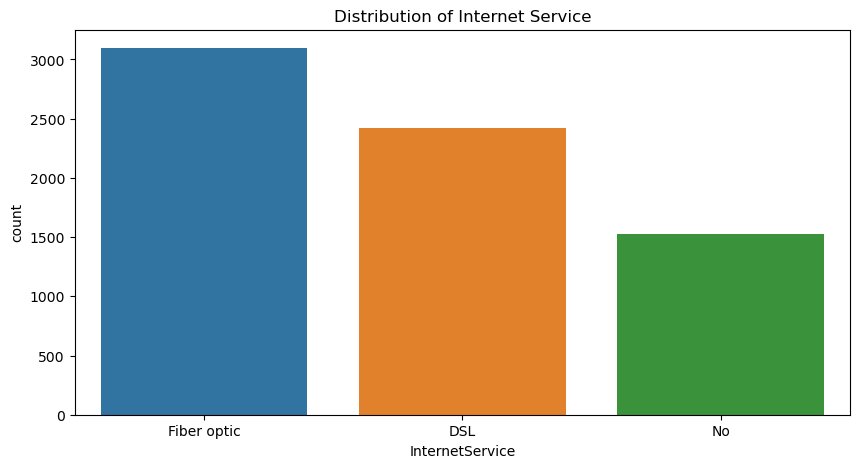

In [16]:
plt.figure(figsize=(10,5)) 
sns.countplot(x = df['InternetService'], data = df, order = df['InternetService'].value_counts(ascending= False).index)
plt.title('Distribution of Internet Service')

#### Observation:
Fiber optic has the highest counts in internet service distribution with over 3000 users, followed by DSL with about 2400 users while like 1500 customers do not use internet service at all. It is in ascending order from highest to lowest order. 

Text(0.5, 1.0, 'Distribution of Contract')

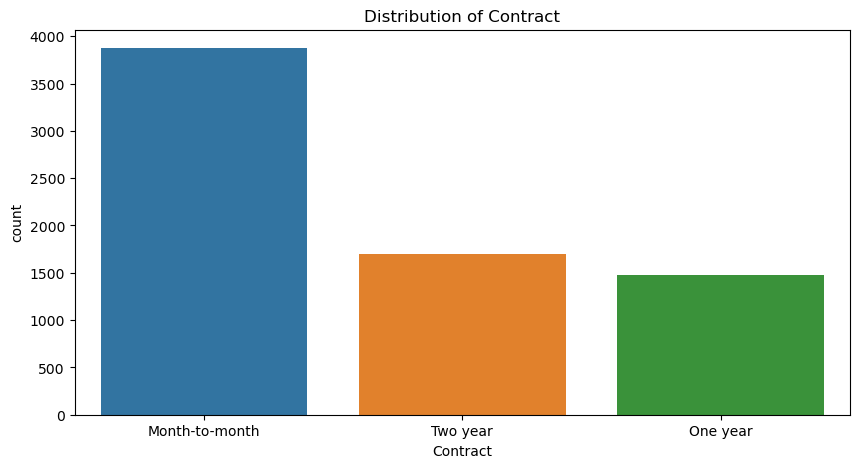

In [17]:
plt.figure(figsize=(10,5)) 
sns.countplot(x = df['Contract'], data = df, order = df['Contract'].value_counts(ascending= False).index)
plt.title('Distribution of Contract')

#### Observation:
Month-to-Month contracts has the highest counts in contract distribution with 3850 users, followed by Two-year contract with  1600 users while like 1400 customers subscribe to one year contract. 

### Bivariate Analysis

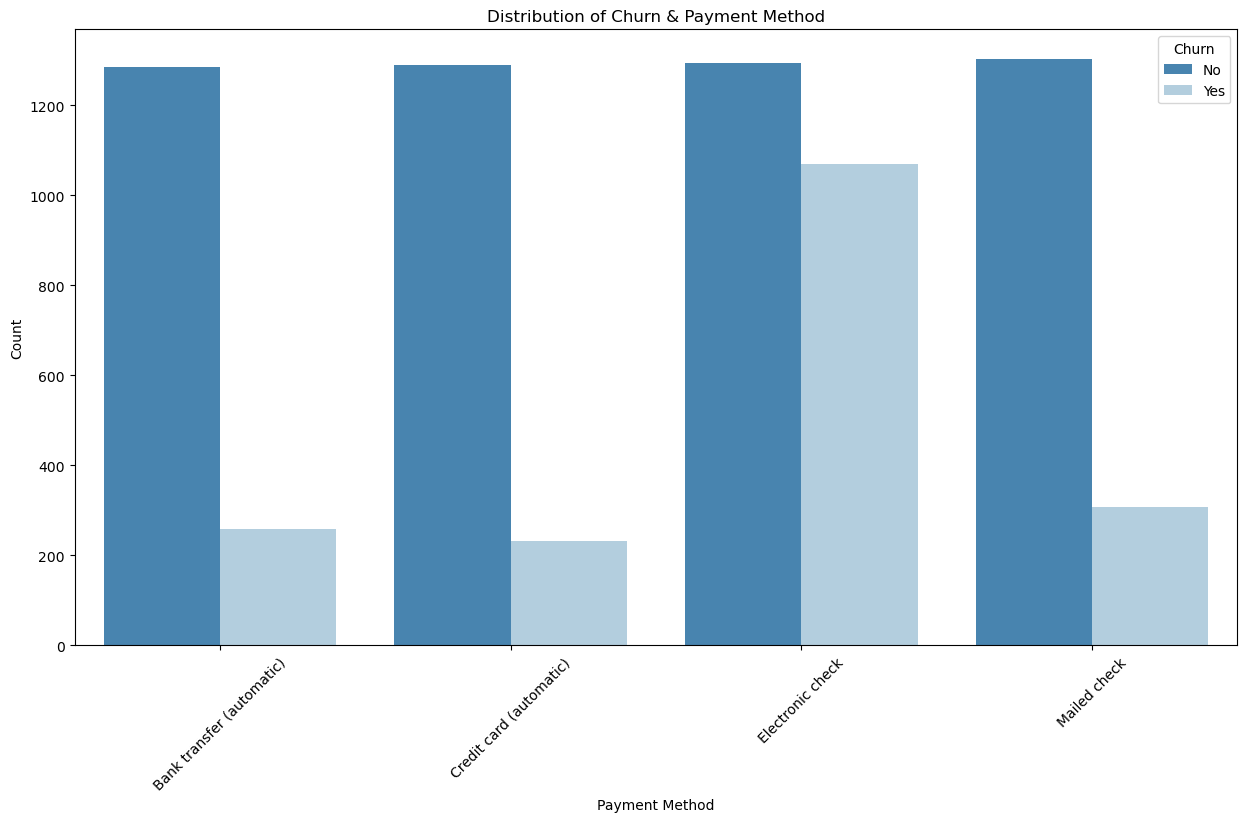

In [18]:
# Create a DataFrame with counts of PaymentMethod for each Churn category
payment_counts = df.groupby(['Churn', 'PaymentMethod']).size().reset_index(name='Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='PaymentMethod', y='Count', hue='Churn', data=payment_counts, palette='Blues_r')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Churn & Payment Method')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Observation:
Electronic check payment method was mostly affected by churn with 1050 counts of customers leaving. Mailed check has 300 counts of customers leaving while Bank transfer(automatic) and credit card(automatic) have counts of 270 and 250 churn customers respectively  

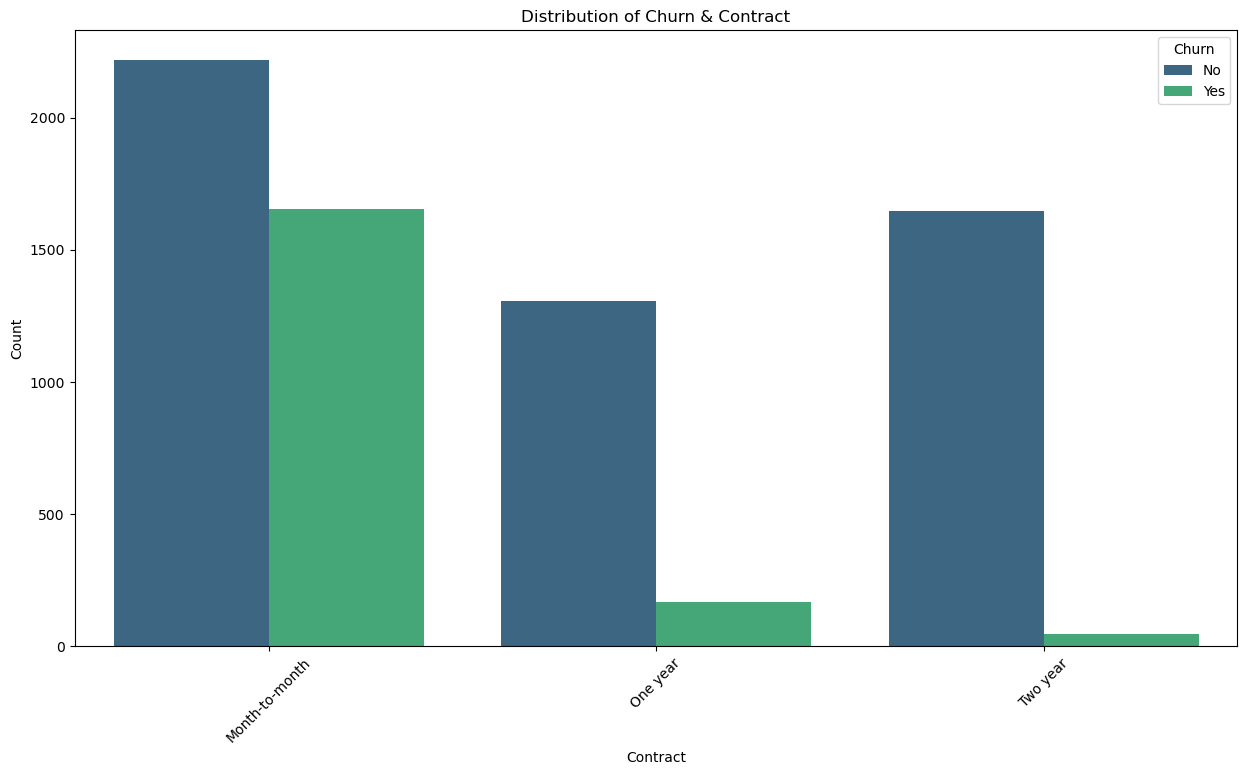

In [19]:
# Create a DataFrame with counts of Contract for each Churn category
contract_counts = df.groupby(['Churn', 'Contract']).size().reset_index(name='Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='Contract', y='Count', hue='Churn', data=contract_counts, palette='viridis')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Distribution of Churn & Contract')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Observation:
Month-to-Month contract has the highest churn with 1650 counts of customers leaving. One-year contract has 150 counts of customers leaving while Two-year contract has counts of 50 churn of customers  

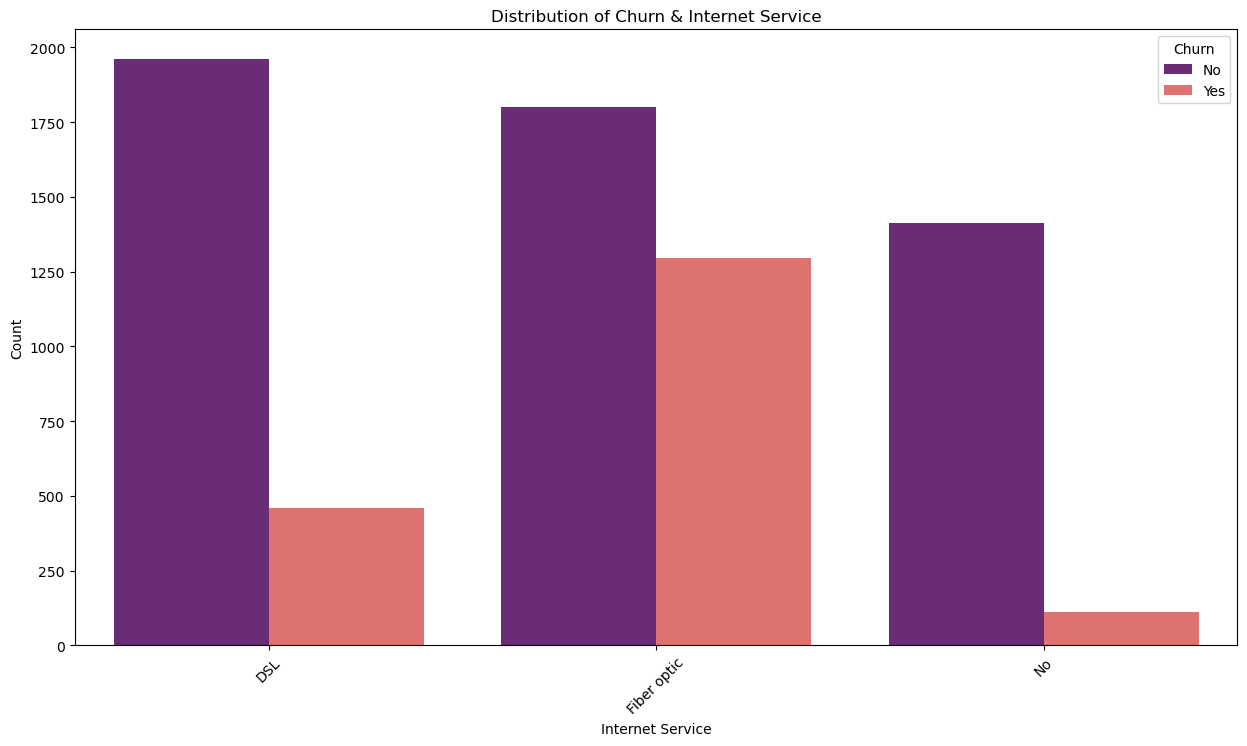

In [20]:
# Create a DataFrame with counts of internet service for each Churn category
internet_service_counts = df.groupby(['Churn', 'InternetService']).size().reset_index(name='Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='InternetService', y='Count', hue='Churn', data=internet_service_counts, palette='magma')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Churn & Internet Service')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Observation:
Fiber optic internet service has the highest churn with 1250 counts of customers leaving. DSL internet service has 450 counts of customers leaving while customers without internet service usage left.  

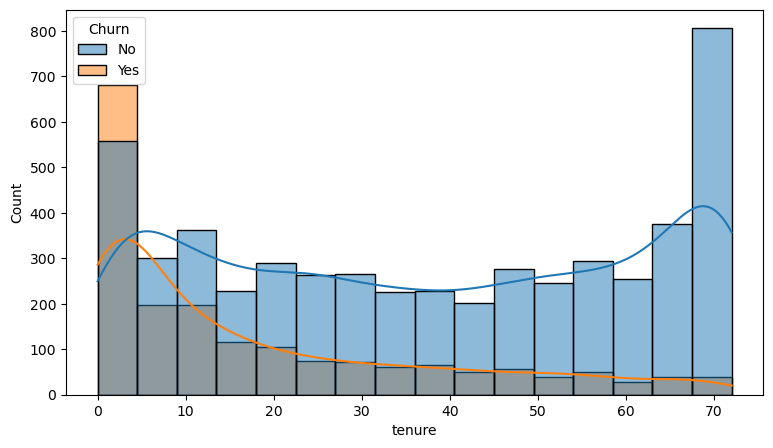

In [21]:
#comparing distributions of the tenure & churn
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="tenure",hue="Churn",kde=True);

#### Observation
It showed that a lot of customers churned in the first 5 months in the company then several customers retained thereafter. The seventieth month witnessed the highest customer retention. The churn distribution is right skewed without outliers              

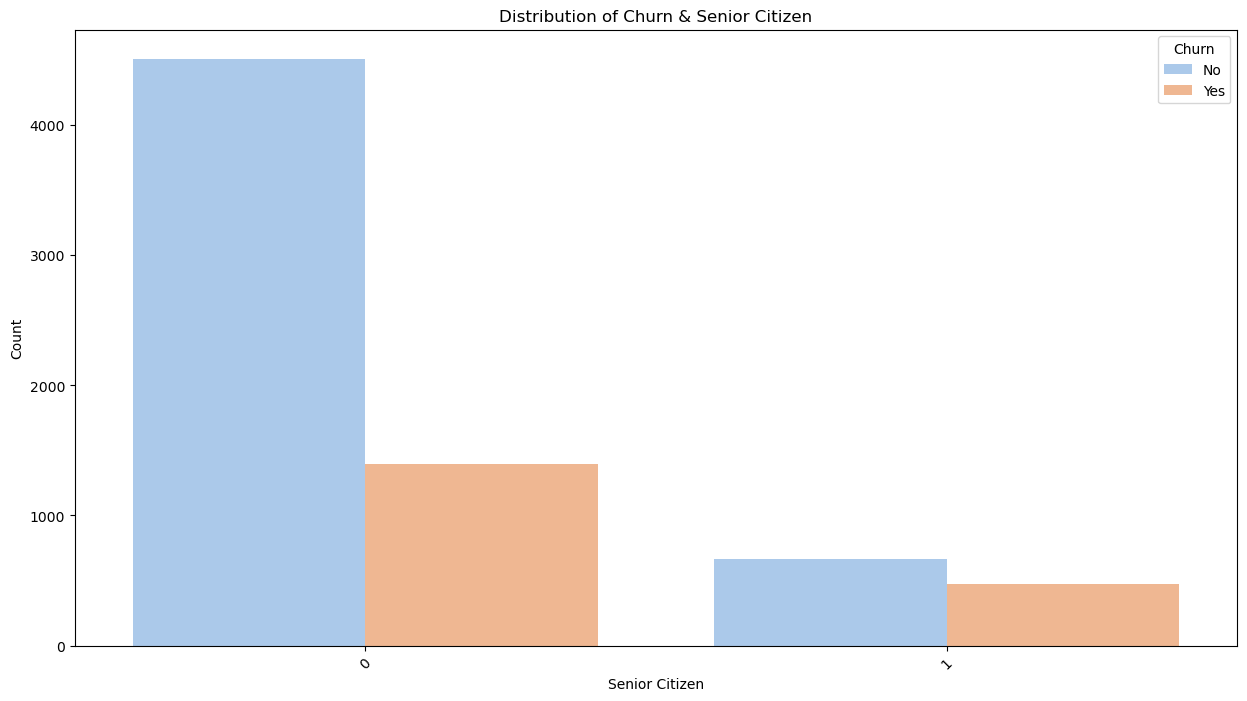

In [22]:
# Create a DataFrame with counts of Senior citizen for each Churn category
senior_citizen_counts = df.groupby(['Churn', 'SeniorCitizen']).size().reset_index(name='Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='SeniorCitizen', y='Count', hue='Churn', data=senior_citizen_counts, palette='pastel')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Distribution of Churn & Senior Citizen')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Observation:
Non senior citizens have higher counts with 1400 churn of customers than senior citizens having 400 counts of customers churn. 

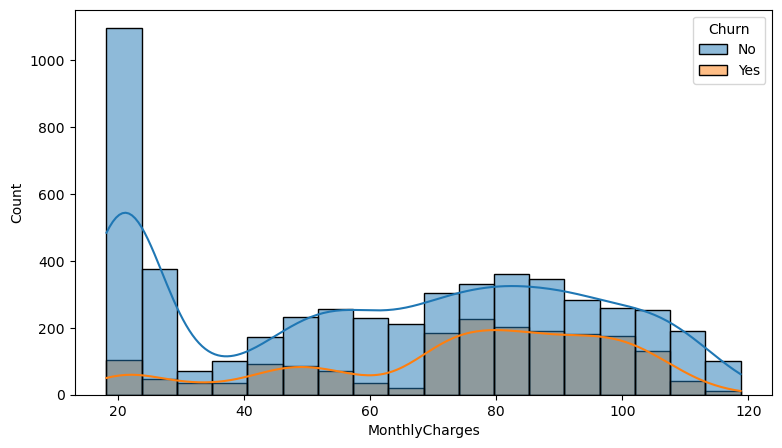

In [23]:
#comparing distributions of the monthly charges & churn
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="MonthlyCharges",hue="Churn",kde=True);

#### Observation:
The retention of the customers was observed across the monthly charges. There was the highest customer retention at 20 dollars monthly charges.

### Multivariate Analysis

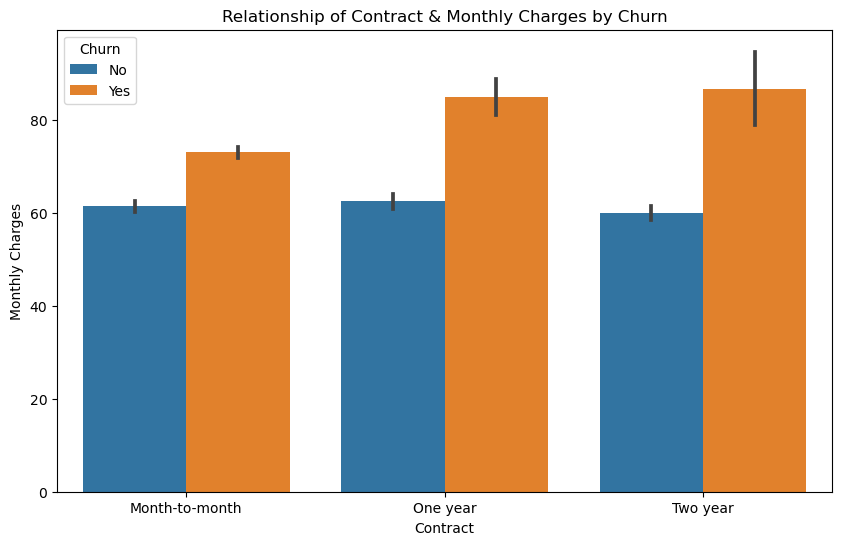

In [24]:
# Relationship of Churn, Contract and Monthly Charges
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)

# Add labels and title
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.title('Relationship of Contract & Monthly Charges by Churn')

# Show the plot
plt.show()

#### Observation:
There was approximately the highest churn of customers in one-year and two-year contract with the distribution of monthly charges. Month-to-Month contract experienced least churn of customers.  


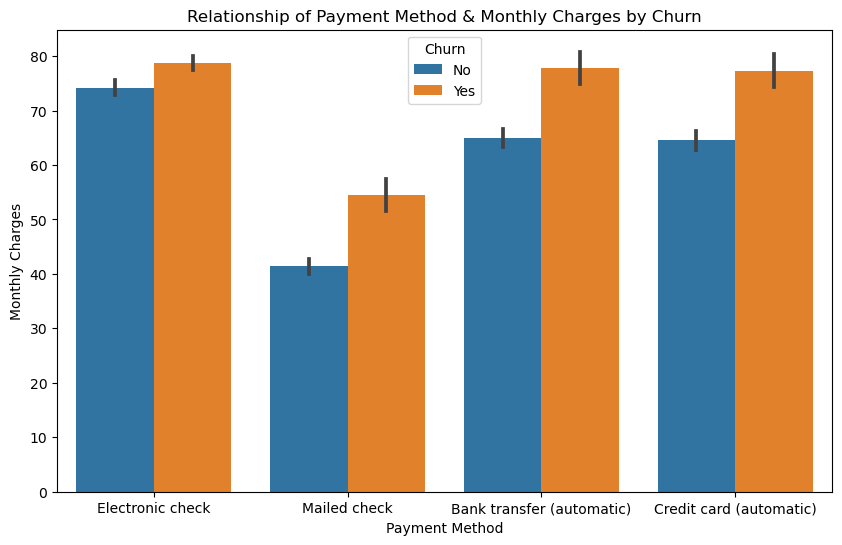

In [25]:
# Relationship of Churn, Payment Method and Monthly Charges
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(x='PaymentMethod', y='MonthlyCharges', hue='Churn', data=df)

# Add labels and title
plt.xlabel('Payment Method')
plt.ylabel('Monthly Charges')
plt.title('Relationship of Payment Method & Monthly Charges by Churn')

# Show the plot
plt.show()

#### Observation:
There was the highest churn of customers in Electronic check, Bank transfer and credit card payment method with the distribution of monthly charges. Mailed check payment method experienced the least churn on monthly charges.  


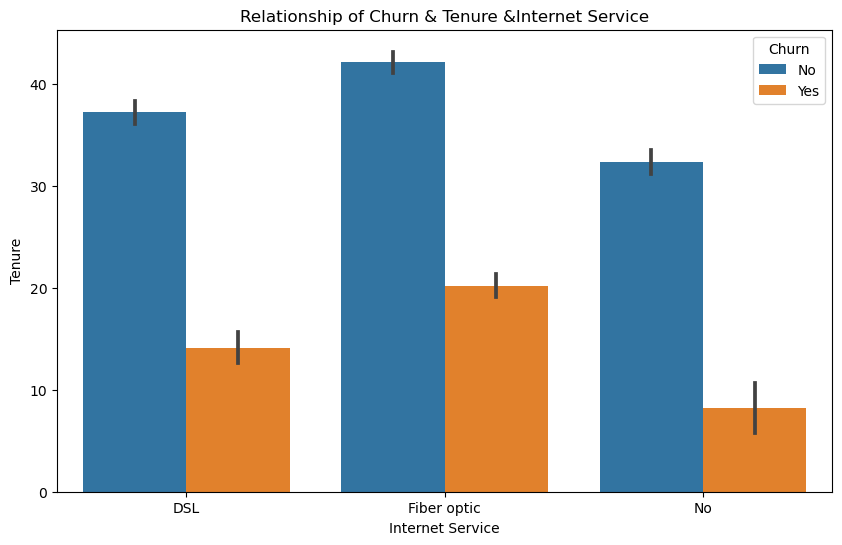

In [26]:
# Relationship of Churn & Tenure &Internet Service
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(x='InternetService', y='tenure', hue='Churn', data=df)

# Add labels and title
plt.xlabel('Internet Service')
plt.ylabel('Tenure')
plt.title('Relationship of Churn & Tenure &Internet Service')

# Show the plot
plt.show()

#### Observation:
Fiber Optic internet service has highest churn of customers with the distribution of tenure, followed by DSL and No internet service has the least.

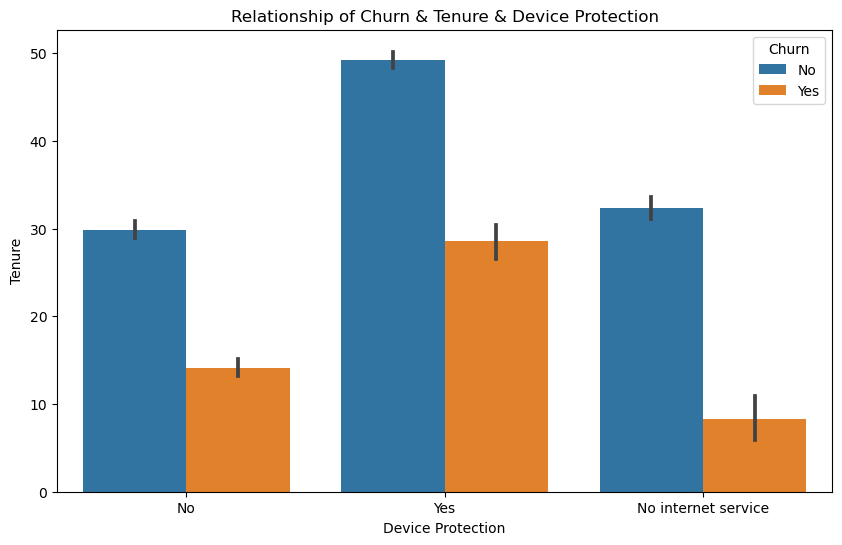

In [27]:
# Relationship of Churn & Tenure & Device Protection
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(x='DeviceProtection', y='tenure', hue='Churn', data=df)

# Add labels and title
plt.xlabel('Device Protection')
plt.ylabel('Tenure')
plt.title('Relationship of Churn & Tenure & Device Protection')

# Show the plot
plt.show()

#### Observation:
Customers with device protection has highest churn with the distribution of tenure, followed by customers without device protection and No internet service has the least.

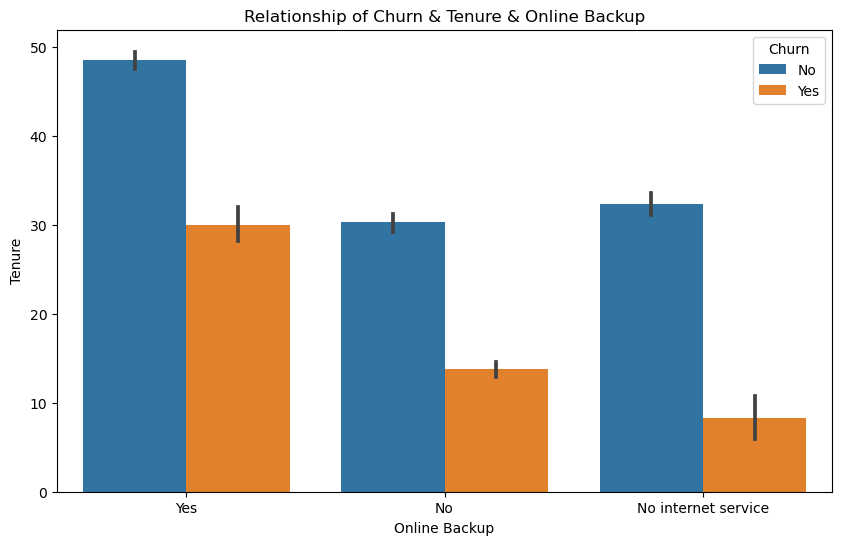

In [28]:
# Relationship of Churn & Tenure & Online Backup
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(x='OnlineBackup', y='tenure', hue='Churn', data=df)

# Add labels and title
plt.xlabel('Online Backup')
plt.ylabel('Tenure')
plt.title('Relationship of Churn & Tenure & Online Backup')

# Show the plot
plt.show()

#### Observation:
Customers with online backup has highest churn  with the distribution of tenure, followed by customers without online backup and No internet service has the least.

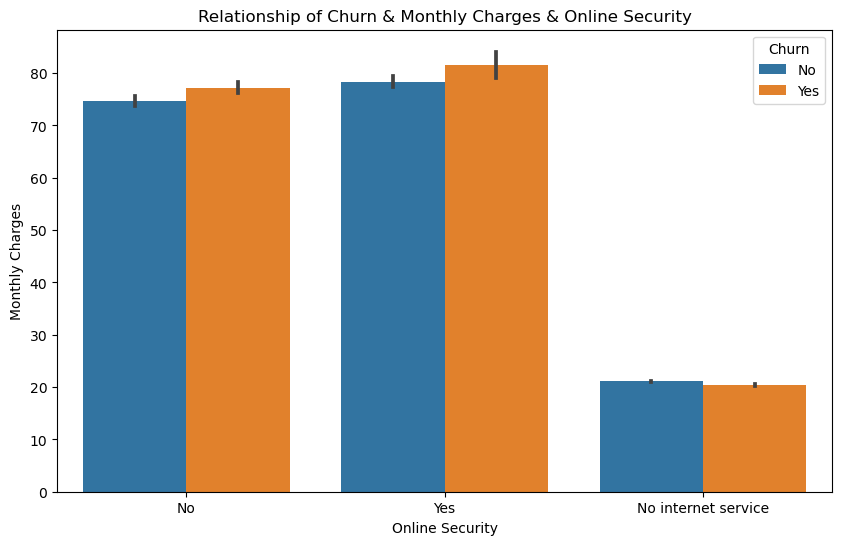

In [29]:
# Relationship of Churn & Monthly Charges & Online Security
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.barplot(x='OnlineSecurity', y='MonthlyCharges', hue='Churn', data=df)

# Add labels and title
plt.xlabel('Online Security')
plt.ylabel('Monthly Charges')
plt.title('Relationship of Churn & Monthly Charges & Online Security')

# Show the plot
plt.show()

#### Observation:
Customers with online security has highest churn  based on monthly charges, followed bycustomers without online security and No internet service has the least.

C:\Users\DELL PRO\AppData\Local\Temp\ipykernel_12032\3221013288.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


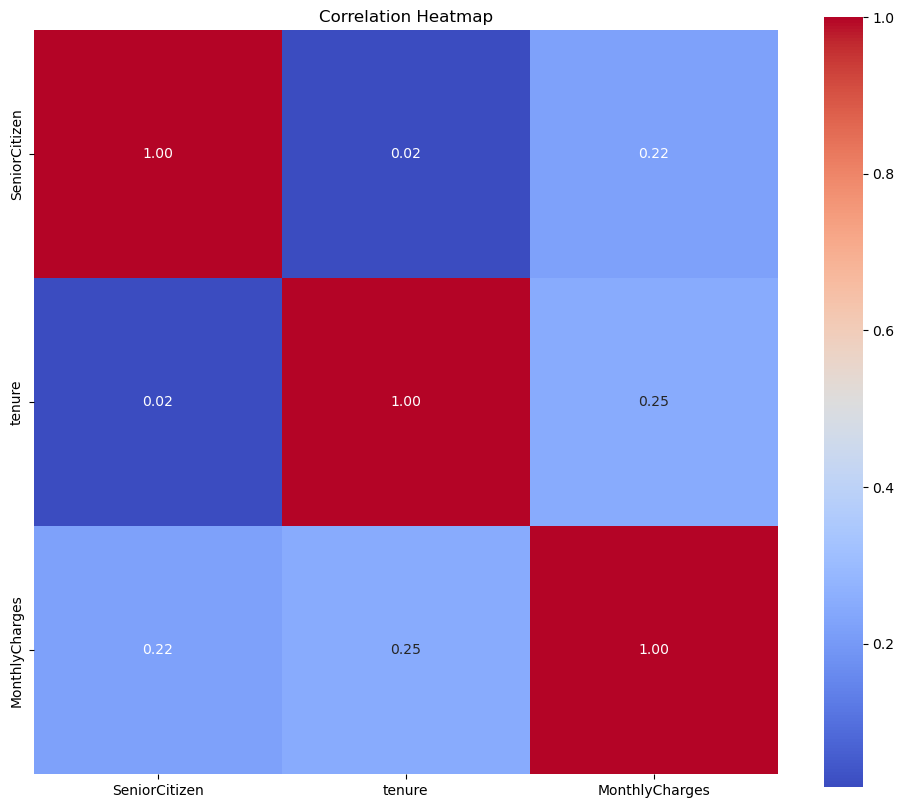

In [30]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

#### Observation:
The chart above shows the positive linear relationship among senior citizen, tenure and monthly charges in correlation matrix. The relation is positively weak.

#### Data Mining, Cleaning and Manipulation

In [31]:
# Constructing new feature from churn
def churn_value(name):
    if name == 'Yes':
        return 1
    else:
        return 0
    
# Applying the function to the churn column

df['Churn_rename']= df['Churn'].apply(churn_value) 

In [32]:
# Identifying df dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_rename
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [33]:
# Dropping the unneccesary features

df1= df.drop(['customerID','Churn'], axis=1)

In [34]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_rename
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [35]:
# Identifying newly constructed df1 dataframe
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn_rename'],
      dtype='object')

### SUPERVISED MACHINE LEARNING SECTION
DATA PREPROCESSING; FEATURE ENGINEERING, ENCODING,SCALING, DATA SPLITTING

DATA MODELLING

METRICS EVALUATION

#### Feature Segmentation

In [36]:
# Segmenting the data features
df2= df1.drop("Churn_rename", axis=1)
target= df1["Churn_rename"]

In [37]:
# comfirming the shape of both independent and dependent features
print(df2.shape, target.shape)

(7043, 19) (7043,)


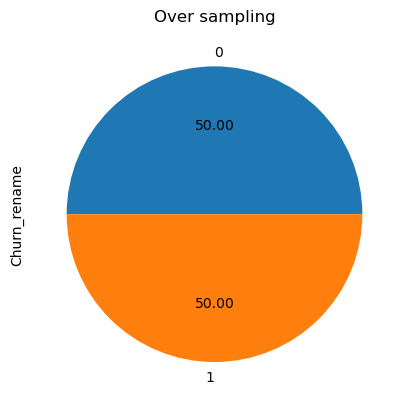

In [38]:
from imblearn.over_sampling import RandomOverSampler
# ros= RandomOverSampler(sampling_strategy= 1) # float
ros= RandomOverSampler(sampling_strategy= "not majority")

df2_ros, target_ros= ros.fit_resample(df2, target)

ax = target_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over sampling")

In [39]:
# comfirming the shape of both independent and dependent features
print(df2_ros.shape, target_ros.shape)

(10348, 19) (10348,)


#### Data Encoding

In [40]:
# Data Encoding
# Method Initializtion
from sklearn.preprocessing import LabelEncoder
# Instantiating tthe method
encoder= LabelEncoder()
# looping in columns
for i in df2_ros.columns:
    if(df2_ros[i].dtype=='object'):
        df2_ros[i]= encoder.fit_transform(df2_ros[i])
    else:
        df2_ros[i]=df2_ros[i]
# df2_ros.head()

### Feature Importance Plot

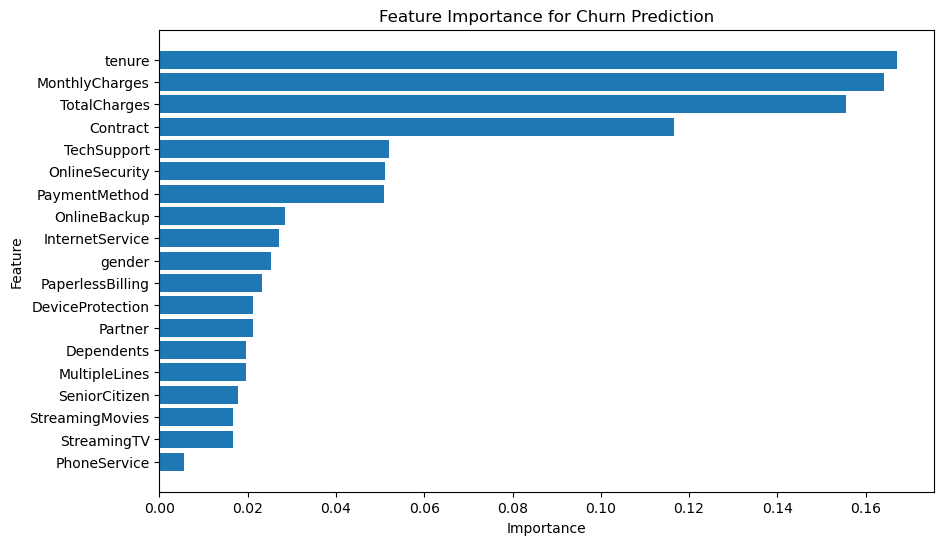

In [41]:
# Import the neccesary model
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(df2_ros, target_ros)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': df2_ros.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Churn Prediction')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


#### Observation
This is the ascending order of the feature importance to the target features(churn)

#### Data Scaling

In [42]:
# Scaling the dataset using library
from sklearn.preprocessing import MinMaxScaler
# Method Initialization
scaler= MinMaxScaler()
df2_ros_scaled= scaler.fit_transform(df2_ros)
# df2_ros_scaled

#### Data Splitting

In [43]:
# Splitting the data to training and evaluation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df2_ros_scaled, target_ros, test_size=0.33, random_state=42)

# Model Building
# classifier libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
# xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#### Data Modelling and Metrics Evaluation

In [44]:
# Method Initialization
xgb= XGBClassifier()
random= RandomForestClassifier()
kneigh= KNeighborsClassifier()
sgd= SGDClassifier()
svcc= SVC()
gauss= GaussianNB()
decision= DecisionTreeClassifier()
logic= LogisticRegression()

# Fitting for model training
xgb.fit(X_train,y_train)
random.fit(X_train,y_train)
kneigh.fit(X_train,y_train)
sgd.fit(X_train,y_train)
svcc.fit(X_train,y_train)
gauss.fit(X_train,y_train)
decision.fit(X_train,y_train)
logic.fit(X_train,y_train)

# Model Prediction
xgb_pred= xgb.predict(X_test)
random_pred= random.predict(X_test)
kneigh_pred= kneigh.predict(X_test)
sgd_pred= sgd.predict(X_test)
svcc_pred= svcc.predict(X_test)
gauss_pred= gauss.predict(X_test)
decision_pred= decision.predict(X_test)
logic_pred= logic.predict(X_test)

# Model Evaluation Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Simplifying the models
models= ['XGBClassifier','RandomForestClassifier','KNeighborsClassifier','SGDClassifier','SVC','GaussianNB','DecisionTreeClassifier','LogisticRegression']





In [45]:
# Printing of evaluation metrics for XGBClassifier
acc_sc= accuracy_score(y_test,xgb_pred) 
pre_sc= precision_score(y_test,xgb_pred)
rec_sc= recall_score(y_test,xgb_pred)
f1_sc= f1_score(y_test,xgb_pred)
r_a_sc= roc_auc_score(y_test,xgb_pred)

# Printing
print('XGBClassifier')
print(f'The accuracy score for {models[0]} is {acc_sc}')
print(f'The precision score for {models[0]} is {pre_sc}')
print(f'The recall score for{models[0]} is {rec_sc}')
print(f'The f1 score for{models[0]} is {f1_sc}')
print(f'The roc auc score for{models[0]} is {r_a_sc}')

XGBClassifier
The accuracy score for XGBClassifier is 0.8541727672035139
The precision score for XGBClassifier is 0.8131926121372032
The recall score forXGBClassifier is 0.914540059347181
The f1 score forXGBClassifier is 0.8608938547486032
The roc auc score forXGBClassifier is 0.8549578909452669


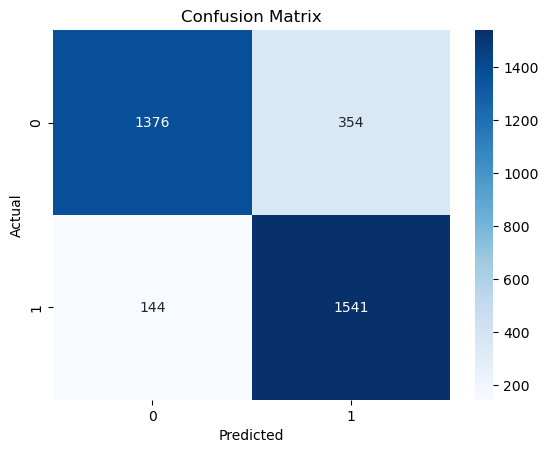

In [46]:
# Create a confusion matrix
c_mat= confusion_matrix(y_test,xgb_pred)
#vitualise the confusion matrix
sns.heatmap(c_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###  Observation on confusion matrix
###  0 = Customer retention
###  1 = Customer churn

. 1539 customers are actually predicted for churn.

. 1381 customers are actually predicted for retention.

. 349 customers are falsely predicted for churn.

. 146 customers are falsely predicted for retention.



In [47]:
# Printing of evaluation metrics for RandomForestClassifier
acc_sc= accuracy_score(y_test,random_pred) 
pre_sc= precision_score(y_test,random_pred)
rec_sc= recall_score(y_test,random_pred)
f1_sc= f1_score(y_test,random_pred)
r_a_sc= roc_auc_score(y_test,random_pred)

# Printing
print('RandomForestClassifier')
print(f'The accuracy score for {models[1]} is {acc_sc}')
print(f'The precision score for {models[1]} is {pre_sc}')
print(f'The recall score for{models[1]} is {rec_sc}')
print(f'The f1 score for{models[1]} is {f1_sc}')
print(f'The roc auc score for{models[1]} is {r_a_sc}')

RandomForestClassifier
The accuracy score for RandomForestClassifier is 0.8796486090775988
The precision score for RandomForestClassifier is 0.8406417112299466
The recall score forRandomForestClassifier is 0.9329376854599406
The f1 score forRandomForestClassifier is 0.8843881856540085
The roc auc score forRandomForestClassifier is 0.8803416750999126


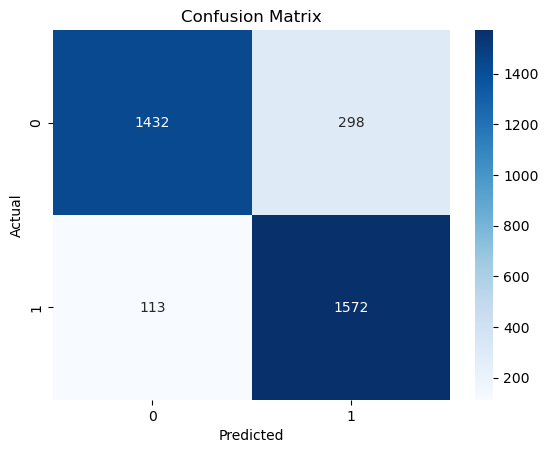

In [48]:
# Create a confusion matrix
c_mat= confusion_matrix(y_test,random_pred)
#vitualise the confusion matrix
sns.heatmap(c_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###  Observation on confusion matrix
###  0 = Customer retention
###  1 = Customer churn

. 1576 customers are actually predicted for churn.

. 1438 customers are actually predicted for retention.

. 292 customers are falsely predicted for churn.

. 109 customers are falsely predicted for retention.


In [49]:
# Printing of evaluation metrics for KNeighborsClassifier
acc_sc= accuracy_score(y_test,kneigh_pred) 
pre_sc= precision_score(y_test,kneigh_pred)
rec_sc= recall_score(y_test,kneigh_pred)
f1_sc= f1_score(y_test,kneigh_pred)
r_a_sc= roc_auc_score(y_test,kneigh_pred)

# Printing
print('KNeighborsClassifier')
print(f'The accuracy score for {models[2]} is {acc_sc}')
print(f'The precision score for {models[2]} is {pre_sc}')
print(f'The recall score for{models[2]} is {rec_sc}')
print(f'The f1 score for{models[2]} is {f1_sc}')
print(f'The roc auc score for{models[2]} is {r_a_sc}')

KNeighborsClassifier
The accuracy score for KNeighborsClassifier is 0.7543191800878477
The precision score for KNeighborsClassifier is 0.7121364092276831
The recall score forKNeighborsClassifier is 0.8427299703264095
The f1 score forKNeighborsClassifier is 0.7719488991573797
The roc auc score forKNeighborsClassifier is 0.7554690314059793


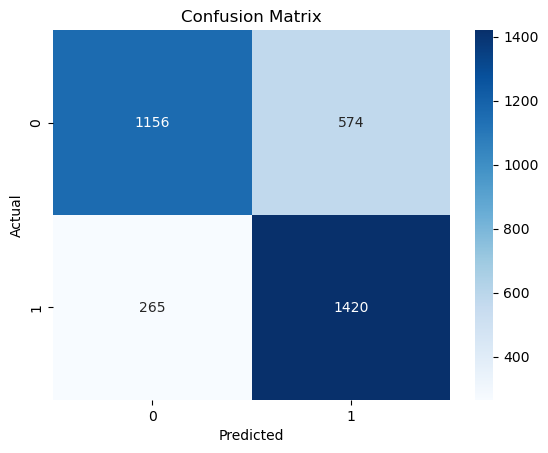

In [50]:
# Create a confusion matrix
c_mat= confusion_matrix(y_test,kneigh_pred)
#vitualise the confusion matrix
sns.heatmap(c_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###  Observation on confusion matrix
###  0 = Customer retention
###  1 = Customer churn

. 1428 customers are actually predicted for churn.

. 1166 customers are actually predicted for retention.

. 564 customers are falsely predicted for churn.

. 257 customers are falsely predicted for retention.

In [51]:
# Printing of evaluation metrics for SGDClassifier
acc_sc= accuracy_score(y_test,sgd_pred) 
pre_sc= precision_score(y_test,sgd_pred)
rec_sc= recall_score(y_test,sgd_pred)
f1_sc= f1_score(y_test,sgd_pred)
r_a_sc= roc_auc_score(y_test,sgd_pred)

# Printing
print('SGDClassifier')
print(f'The accuracy score for {models[3]} is {acc_sc}')
print(f'The precision score for {models[3]} is {pre_sc}')
print(f'The recall score for{models[3]} is {rec_sc}')
print(f'The f1 score for{models[3]} is {f1_sc}')
print(f'The roc auc score for{models[3]} is {r_a_sc}')

SGDClassifier
The accuracy score for SGDClassifier is 0.7221083455344071
The precision score for SGDClassifier is 0.6524440762220381
The recall score forSGDClassifier is 0.9347181008902077
The f1 score forSGDClassifier is 0.7684801171017321
The roc auc score forSGDClassifier is 0.7248735013121559


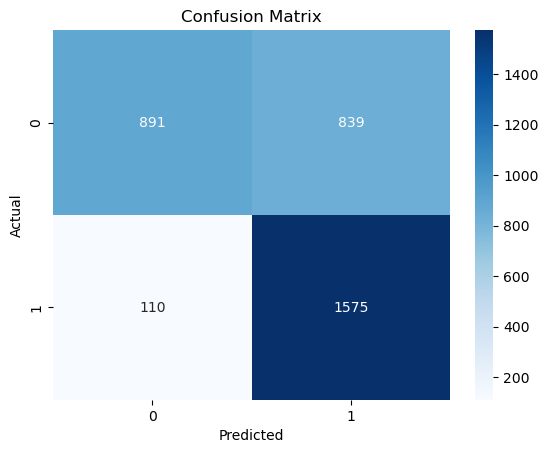

In [52]:
# Create a confusion matrix
c_mat= confusion_matrix(y_test,sgd_pred)
#vitualise the confusion matrix
sns.heatmap(c_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###  Observation on confusion matrix
###  0 = Customer retention
###  1 = Customer churn

. 1390 customers are actually predicted for churn.

. 1252 customers are actually predicted for retention.

. 478 customers are falsely predicted for churn.

. 295 customers are falsely predicted for retention.

In [53]:
# Printing of evaluation metrics for SVC
acc_sc= accuracy_score(y_test,svcc_pred) 
pre_sc= precision_score(y_test,svcc_pred)
rec_sc= recall_score(y_test,svcc_pred)
f1_sc= f1_score(y_test,svcc_pred)
r_a_sc= roc_auc_score(y_test,svcc_pred)

# Printing
print('SVC')
print(f'The accuracy score for {models[4]} is {acc_sc}')
print(f'The precision score for {models[4]} is {pre_sc}')
print(f'The recall score for{models[4]} is {rec_sc}')
print(f'The f1 score for{models[4]} is {f1_sc}')
print(f'The roc auc score for{models[4]} is {r_a_sc}')

SVC
The accuracy score for SVC is 0.7859443631039531
The precision score for SVC is 0.7539936102236422
The recall score forSVC is 0.8403560830860534
The f1 score forSVC is 0.7948358125175413
The roc auc score forSVC is 0.7866520299823331


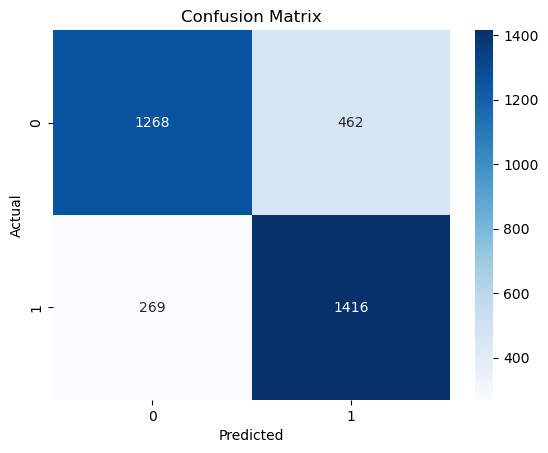

In [54]:
# Create a confusion matrix
c_mat= confusion_matrix(y_test,svcc_pred)
#vitualise the confusion matrix
sns.heatmap(c_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###  Observation on confusion matrix
###  0 = Customer retention
###  1 = Customer churn

. 1419 customers are actually predicted for churn.

. 1294 customers are actually predicted for retention.

. 436 customers are falsely predicted for churn.

. 266 customers are falsely predicted for retention.

In [55]:
# Printing of evaluation metrics for GaussianNB
acc_sc= accuracy_score(y_test,gauss_pred) 
pre_sc= precision_score(y_test,gauss_pred)
rec_sc= recall_score(y_test,gauss_pred)
f1_sc= f1_score(y_test,gauss_pred)
r_a_sc= roc_auc_score(y_test,gauss_pred)

# Printing
print('GaussianNB')
print(f'The accuracy score for {models[5]} is {acc_sc}')
print(f'The precision score for {models[5]} is {pre_sc}')
print(f'The recall score for{models[5]} is {rec_sc}')
print(f'The f1 score for{models[5]} is {f1_sc}')
print(f'The roc auc score for{models[5]} is {r_a_sc}')

GaussianNB
The accuracy score for GaussianNB is 0.7537335285505125
The precision score for GaussianNB is 0.7373453318335208
The recall score forGaussianNB is 0.7780415430267063
The f1 score forGaussianNB is 0.7571469823852152
The roc auc score forGaussianNB is 0.7540496732474573


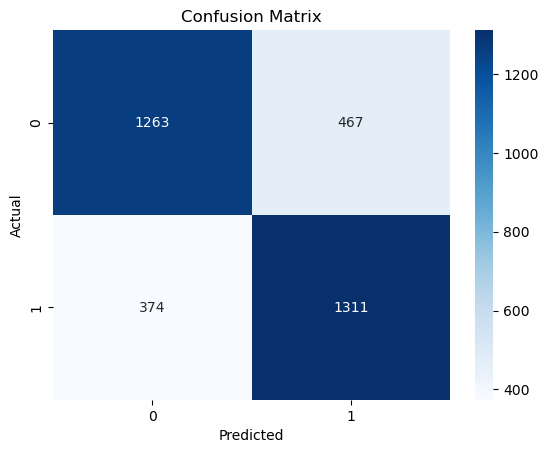

In [56]:
# Create a confusion matrix
c_mat= confusion_matrix(y_test,gauss_pred)
#vitualise the confusion matrix
sns.heatmap(c_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###  Observation on confusion matrix
###  0 = Customer retention
###  1 = Customer churn

. 1355 customers are actually predicted for churn.

. 1267 customers are actually predicted for retention.

. 463 customers are falsely predicted for churn.

. 330 customers are falsely predicted for retention.

In [57]:
# Printing of evaluation metrics for DecisionTreeClassifier
acc_sc= accuracy_score(y_test,decision_pred) 
pre_sc= precision_score(y_test,decision_pred)
rec_sc= recall_score(y_test,decision_pred)
f1_sc= f1_score(y_test,decision_pred)
r_a_sc= roc_auc_score(y_test,decision_pred)

# Printing
print('DecisionTreeClassifier')
print(f'The accuracy score for {models[6]} is {acc_sc}')
print(f'The precision score for {models[6]} is {pre_sc}')
print(f'The recall score for{models[6]} is {rec_sc}')
print(f'The f1 score for{models[6]} is {f1_sc}')
print(f'The roc auc score for{models[6]} is {r_a_sc}')

DecisionTreeClassifier
The accuracy score for DecisionTreeClassifier is 0.8445095168374817
The precision score for DecisionTreeClassifier is 0.7968106995884774
The recall score forDecisionTreeClassifier is 0.9192878338278931
The f1 score forDecisionTreeClassifier is 0.8536786993662165
The roc auc score forDecisionTreeClassifier is 0.8454820672029639


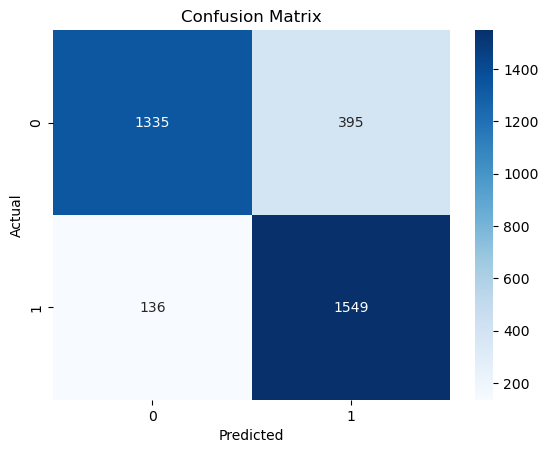

In [58]:
# Create a confusion matrix
c_mat= confusion_matrix(y_test,decision_pred)
#vitualise the confusion matrix
sns.heatmap(c_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###  Observation on confusion matrix
###  0 = Customer retention
###  1 = Customer churn

. 1543 customers are actually predicted for churn.

. 1355 customers are actually predicted for retention.

. 375 customers are falsely predicted for churn.

. 142 customers are falsely predicted for retention.

In [59]:
# Printing of evaluation metrics for LogisticRegression
acc_sc= accuracy_score(y_test,logic_pred) 
pre_sc= precision_score(y_test,logic_pred)
rec_sc= recall_score(y_test,logic_pred)
f1_sc= f1_score(y_test,logic_pred)
r_a_sc= roc_auc_score(y_test,logic_pred)

# Printing
print('LogisticRegression')
print(f'The accuracy score for {models[7]} is {acc_sc}')
print(f'The precision score for {models[7]} is {pre_sc}')
print(f'The recall score for{models[7]} is {rec_sc}')
print(f'The f1 score for{models[7]} is {f1_sc}')
print(f'The roc auc score for{models[7]} is {r_a_sc}')

LogisticRegression
The accuracy score for LogisticRegression is 0.7666178623718888
The precision score for LogisticRegression is 0.7474916387959866
The recall score forLogisticRegression is 0.7958456973293768
The f1 score forLogisticRegression is 0.7709111813739581
The roc auc score forLogisticRegression is 0.7669979931733589


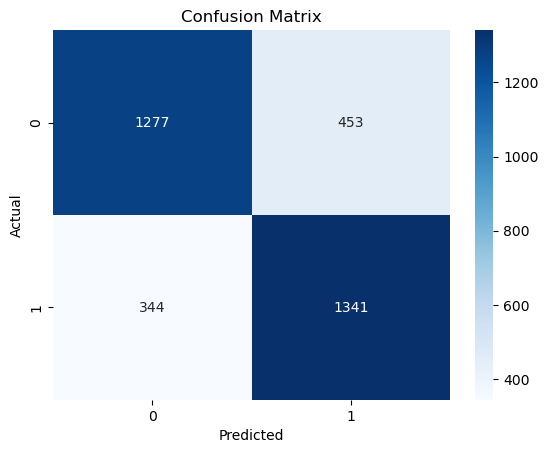

In [60]:
# Create a confusion matrix
c_mat= confusion_matrix(y_test,logic_pred)
#vitualise the confusion matrix
sns.heatmap(c_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###  Observation on confusion matrix
###  0 = Customer retention
###  1 = Customer churn

. 1386 customers are actually predicted for churn.

. 1280 customers are actually predicted for retention.

. 450 customers are falsely predicted for churn.

. 299 customers are falsely predicted for retention.

### Hyperparameter tuning

In [61]:
# Importing neccesary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over by making Dictionary
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='recall',  # Use an appropriate scoring metric
    cv=5,                # Number of cross-validation folds
    verbose=1,           # Print progress during the search
    n_jobs=-1            # Use all available CPU cores
)


In [62]:
grid_search.fit(df2_ros, target_ros)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='recall', verbose=1)

In [63]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)
print("Best Score (CV Score):", best_score)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier()
Best Score (CV Score): 0.973719806763285


## OBSERVATION
. I can identify the best performing model(Random Forest Classifier) with a recall score 0.94. The model has the least loss error compared with other recall performance metrics. The model has the lowest false negative of 109 for churn.

. The hyperparameter tuning operation using GridSearchCV has an increasing influence on The model (RandomForestClassifier) that was earlier the best and the model evaluation metrics (recall) that was earlier 0.94 but now after hyperparameter tuning became 0.97

.Payment Method & Churn Analysis: Identifying how the payment method is being influenced by churn in the distribution.  Ascending order of payment method distribution in dataset analysis by churn; Electtonic check, Mailed check, Bank transfer(automatic) and Credit card(automatic)

.Tenure & Churn Analysis: Distribution of tenure and churn. The customer churn is prominent in the first five(5) months. 

.Contract & Churn Analysis: Identifying how the contract relates to churn in the distribution. Ascending order of contract distribution in dataset analysis by churn; Month-to-Month, Two year and One year. 

.Internet service & Churn Analysis: Distribution of internet service and churn. Ascending order of contract distribution in dataset analysis by churn; Fiber optic, DSL and No 

.Senior citizen & Churn Analysis: Distribution of senior citizen and churn. Non senior citizens have higher customer churn

.Monthly charges & Churn Analysis: Distribution of monthly charges and churn. There is customer retention across the distribution but lower customer retention with some monthly charges.

.Distribution of Internet service,Tenure and churn. Fiber optic has the highest customer churn with distribution of Tenure, followed by DSL while No internet service is the least.

.Distribution of Contract, Monthly charges and churn. One year and Two year contract with distribution of monthly charges had more customer churn while Month-to-Month had the least.

.Distribution of Payment method, Monthly charges and churn. Electronic check experienced the highest customer churn with distribution of monthly charges, follwed by bank transfer(automatic), credit card(automatic) and mailed check.

.Distribution of Device Protection,Tenure and churn. Yes has the highest customer churn with distribution of Tenure, followed by No while No internet service is the least.

.Distribution of Online backup,Tenure and churn. Yes has the highest customer churn with distribution of Tenure, followed by No while No internet service is the least.

.Distribution of Online security,Tenure and churn. Yes has the highest customer churn with distribution of Tenure, followed by No while No internet service is the least.


## RECOMMENDATIONS

. Productionizing the best models before deployment 

. A good recommendation for the linear based model to check the regression assumptions

. Discount and incentive strategy should be implemented to minimize customer churn on payment method, contract, internet service, senior citizen category and monthly charges.

. Loyalty rewards should be offered to long term customers for consistency and retention. 

. Marketing strategy should be embraced to prevent customer churn at the early stage and to be able to withstand competition.





### Conclusion
I have been able to apply Exploratory Data Analysis to reveal insightful trends, patterns and information. Connecttel’s Management would be able to make data driven decision’s in the Connecttel customer churn prediction dataset analysis in conjuction with recommendations for prevention of customer churn and effective competition in market domain. I surely believe that implementing these recommendations will curb customer churn and optimize customer retention.